In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [88]:
train = pd.read_csv("C:\\Users\\DELL\\Downloads\\apple_quality.csv")

In [89]:
last_column_name = train.columns[-1]
print(last_column_name)

Quality


In [90]:
train.drop_duplicates(inplace=True)
train.dropna(subset=['Quality'], inplace=True)

In [91]:
y_train=train[last_column_name]
train=train.drop(columns=last_column_name)
train=train.drop(columns='A_id')

In [118]:
import numpy as np
unique_values, counts = np.unique(y_train, return_counts=True)
total=len(y_train)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count/total}")

0: 0.499
1: 0.501


In [92]:
if y_train.dtype not in ['int64', 'float64']:
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
else:
    pass

print(y_train)

[1 1 0 ... 0 1 1]


In [93]:
numerical_features = []
categorical_features = []

for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']
Categorical features: ['Acidity']


In [94]:
# numerical_features=numerical_features+['Acidity']
# print(numerical_features)

numerical_features.append('Acidity')
print(numerical_features)

['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


In [74]:
correlation_matrix = train[numerical_features].corr().abs()
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  
            colname = correlation_matrix.columns[i]  
            correlated_features.add(colname)


df_filtered = train.drop(columns=correlated_features)

features=df_filtered.columns

print(features)

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')


In [96]:
def remove_outliers_iqr(data, threshold=1.4):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    cleaned_data = data[~outliers]
    return cleaned_data

def custom_transformer(data):
    return data.apply(remove_outliers_iqr)


In [97]:
numerical_transformer = Pipeline(steps=[
    ('imputer', 'passthrough'),
    ('scaler', StandardScaler())
])

In [98]:
categorical_features1=[]
categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])


In [99]:
categorical_features=[]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [100]:
custom_transformer = FunctionTransformer(custom_transformer)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('custom', custom_transformer, numerical_features),  
        ('categ', categorical_transformer, categorical_features), 
        ('categ1', categorical_transformer1, categorical_features1), 
        
    ])


In [102]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  DecisionTreeClassifier())
])


In [103]:
param_grid = {
    'preprocessor__num__imputer': [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), KNNImputer(n_neighbors=5), IterativeImputer(max_iter=10, random_state=0)],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'preprocessor__custom__func': [remove_outliers_iqr, None],  
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


In [104]:
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train, y_train)




C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          'passthrough'),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Size',
                                                                          'Weight',
                                                                          'Sweetness',
                                                                          'Crunchiness',
                                                                          'Juiciness',
                                                                          'Ripeness',
                                                                          'Acidity']),
                                                                        ('custom',
                                                                         FunctionTransformer(func=<function custom_transformer at 0x000001DE35E0D760>),
                                                                         ['Size',
                                                                          'Weight...
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'preprocessor__custom__func': [<function remove_outliers_iqr at 0x000001DE35F0A340>,
                                                        None],
                         'preprocessor__num__imputer': [SimpleImputer(),
                                                        SimpleImputer(strategy='median'),
                                                        KNNImputer(),
                                                        IterativeImputer(random_state=0)],
                         'preprocessor__num__scaler': [StandardScaler(),
                                                       MinMaxScaler()]},
             scoring='accuracy')

In [106]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters found: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'preprocessor__custom__func': None, 'preprocessor__num__imputer': KNNImputer(), 'preprocessor__num__scaler': MinMaxScaler()}
Best cross-validation score: 0.81075


In [119]:
ypred=grid_search.predict(train)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,ypred)

array([[1967,   29],
       [  42, 1962]], dtype=int64)

In [121]:
pd.crosstab(y_train,ypred, rownames=['True'], colnames=['Predicted'], margins=True)
y_test=y_train

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))
y_pred_proba = grid_search.predict_proba(train)[:,1]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1996
           1       0.99      0.98      0.98      2004

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



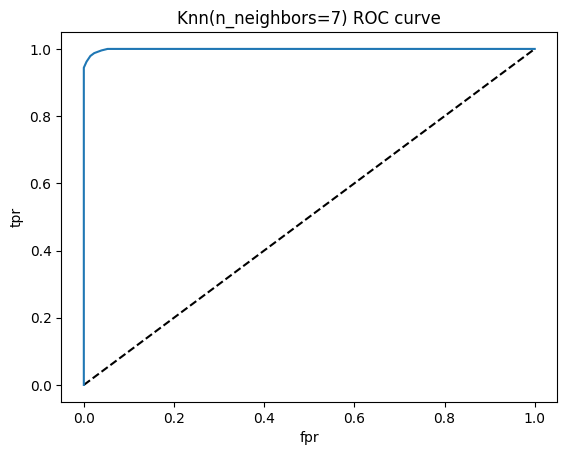

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9991584966339866

In [125]:
grid_search.best_params_

{'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'preprocessor__custom__func': None,
 'preprocessor__num__imputer': KNNImputer(),
 'preprocessor__num__scaler': MinMaxScaler()}

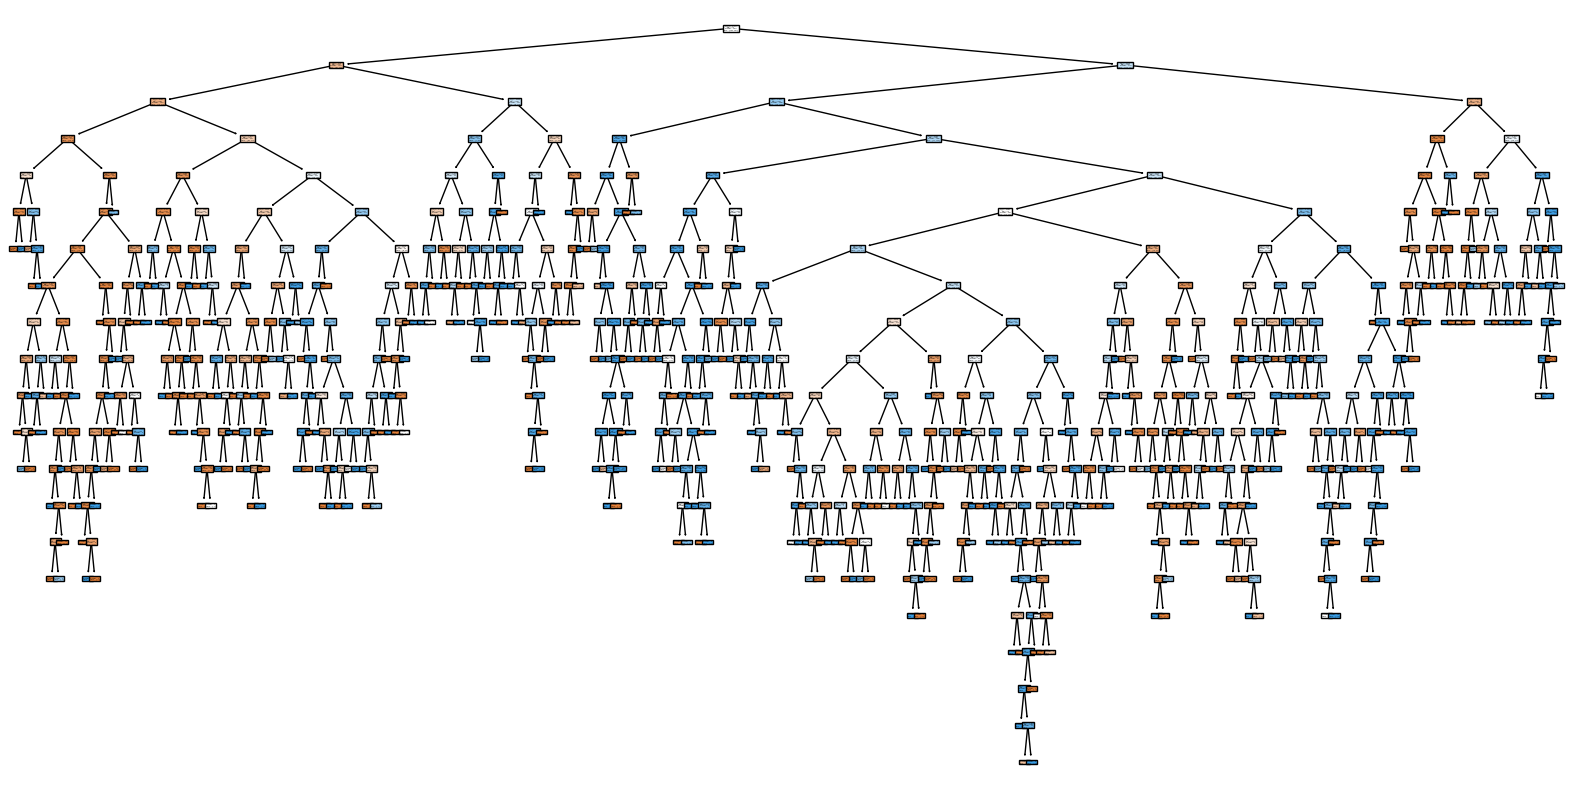

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_['classifier'], filled=True, feature_names=None)

plt.show()
